In [56]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [25]:
train = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, names=['target','id','date','query','username','txt'])

In [26]:
train.head(10)

,target,id,date,query,username,txt
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [27]:
train.shape

(1600000, 6)

In [29]:
test= pd.read_csv('testdata.manual.2009.06.14.csv', header=None, names=['target','id','date','query','username','txt'])

In [30]:
test.head(10)

,target,id,date,query,username,txt
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
8,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
9,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...


In [31]:
train.dtypes

target       int64
id           int64
date        object
query       object
username    object
txt         object
dtype: object

In [7]:
test.shape

(498, 6)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   nq        1600000 non-null  object
 4   username  1600000 non-null  object
 5   txt       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    498 non-null    int64 
 1   id        498 non-null    int64 
 2   date      498 non-null    object
 3   nq        498 non-null    object
 4   username  498 non-null    object
 5   txt       498 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.5+ KB


In [10]:
train.columns

Index(['target', 'id', 'date', 'nq', 'username', 'txt'], dtype='object')

In [33]:
train.target.unique()

array(['negative', 'positive'], dtype=object)

In [32]:
train['target']=train['target'].replace([0,4],['negative','positive'])

In [36]:
positives = train['target'][train.target == 'positive' ]
negatives = train['target'][train.target == 'negative' ]
print('la longueur de notre date est:         {}'.format(train.shape[0]))
print('No. des commentaire positives sont:  {}'.format(len(positives)))
print('No. des commentaire negatives sont: {}'.format(len(negatives)))

la longueur de notre date est:         1600000
No. des commentaire positives sont:  800000
No. des commentaire negatives sont: 800000


In [38]:
train['target'].value_counts().values[0]

800000

In [39]:
train['target'].value_counts().values[1]

800000

In [40]:
train.describe()

,id
count,1.600000e+06
mean,1.998818e+09
std,1.935761e+08
min,1.467810e+09
25%,1.956916e+09
50%,2.002102e+09
75%,2.177059e+09
max,2.329206e+09


In [41]:
def word_count(words):
    return len(words.split())

                          la frequence du nombre des mots dans les tweets


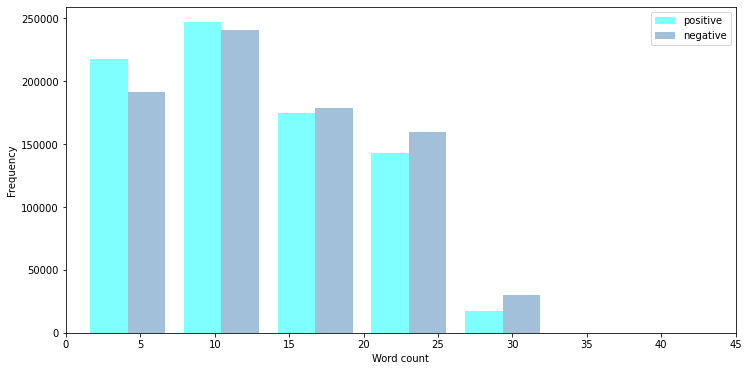

In [75]:
train['word count'] = train['txt'].apply(word_count)
p = train['word count'][train.target == 'positive']
n = train['word count'][train.target == 'negative']
print('                          la frequence du nombre des mots dans les tweets')
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
plt.hist([p, n], color = ['cyan', 'steelblue'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')
plt.show()

C:\Users\hamza lagramez\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

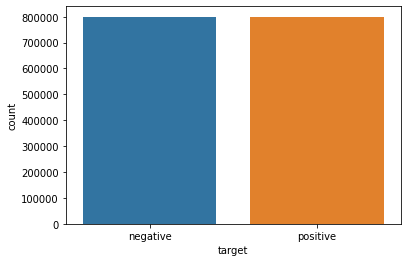

In [67]:
%matplotlib inline
sns.countplot(train['target'])
